# Questions to answer


1.Who are the clientele of KEMRI ?

2.What are the  deparetments  of KEMRI that were visited ? How oftenly were these departments visited?

3.What fraction of the customers felt satisfied, Disatisfied or Neutral?

4.What were the best and worst performing sectors per department? How did different departments perform relative to each other?

5.What are the main services sought by KEMRI customer?

6.What are some of the problems if any encoutered by customers?

7.What are the comments by the KEMRI customers?

8.What were the recommendations by KEMRI Customers?

9.Do peak periods(Months or days) affect user satisfaction?

10.What is the likelyhood of a customer to reccomend KEMRI products or a person to KEMRI?


## Data Understanding

### Data Description

1. Field / variables defined in the 	Description / narrative	Expected Response

2. Serial_number	Form serial number	

3. Department_visited	Department visited	

4. Date	Date of filling out the form	

5. Gender	Male / female	

6. Age	Age of the respondents (years)	

7. Organisation_represented	Which organization respondent's they represent

8. Reception_at_the_gate	Reception at the gate	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
9. Services_at_the_reception_area	Prompt services to customers at the reception area (within 10 minutes of arrival)	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
10. Reception_area_facilities	Reception area facilities (comfort)	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
11. Proffessionalism	Professionalism and courtesy of staff	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
12. General_presentation	General presentation and honesty of staff	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
13. Efficiency	Efficiency with the services provided	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
14. Quality_of_advice_received	Quality of advice /information received	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
15. Knowledge_of_staff_on_products	Knowledge of staff on KEMRI products and servcies	
    1 - very dissatisfied
    2 - dissatisfied
    3 - neutral
    4 - satisfied
    5 - very satisfied
    
16. Recomendation_on_KEMRI_products	How likely are you to recommend KEMRI products / services to another person?	
    Yes
    No
    Not sure
    
17. Diagnostic 	Which kind of service / products were you seeking at KEMRI? - diagnostic	

18. Payments 	Which kind of service / products were you seeking at KEMRI? - MAKING PAYMENTS

19. Procurement	Which kind of service / products were you seeking at KEMRI? - PROCUREMENT	

20. Scientific	Which kind of service / products were you seeking at KEMRI? - SCIENTIFIC	

21. Academic Attachments	Which kind of service / products were you seeking at KEMRI? - ACADEMIC	

22. Information Requesting	Which kind of service / products were you seeking at KEMRI? - INFORMATION GENERATION	

23. Others Services	Which kind of service / products were you seeking at KEMRI? - OTHERS	

24. Any_problems_encountered_explain_if_yes	Which kind of service / products were you seeking at KEMRI? - OTHERS - SPECIFY	

25. Overall_satisfaction	Overall, how satisfied are you with the services / products provided?	

26. Coment	Any other comments	

27. How_to_improve_services	How can we improve on KEMRI services?	


## Installations

In [1]:
# installations
# !pip install xlrd
# !pip install openpyxl
# !pip install --upgrade pip
# !pip install matplotlib.plotly
# import nltk
# nltk.download('wordnet')
# nltk.download('vader_lexicon')

## Importing libraries

In [2]:
# Importing libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image,ImageFont
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
# Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

## Loading data

In [4]:
# loading customer satisfaction excel file

cust_satis_df = pd.read_excel("KEMRI Hackathon Organization Customer Satisfaction dataset.xlsx")


## Previewing data

In [5]:
# previewing first five records

cust_satis_df.head()

,Serial_number,Department_visited,Date,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,Efficiency,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,Diagnostic,Payments,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
0,kemri_01,KEMRI CENTRAL LABORATORIES,2015-08-26 00:00:00,Female,57,NGO,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,1,NaN,NO,Satisfied,YES,Would you like to visit the department with th...,Visitors could be advised on departments that ...
1,kemri_02,Research Partners Laboratory,14/09/2018,Male,26,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,1,NaN,No,Extremely Satified,YES,GOOD RECEPTION AND SERVICES,NaN
2,kemri_03,ADMINISTRATION OFFICES,14/09/2018,Female,40,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,1,NaN,No,Extremely Satified,YES,NaN,NaN
3,kemri_04,KEMRI CENTRAL LABORATORIES,2015-10-03 00:00:00,Female,59,student,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,1,NaN,No,Somewhat,YES,Would have wished to visit more labs than the ...,Give more information and a bit longer time in...
4,kemri_05,ANIMAL FACILITIES,2015-08-26 00:00:00,Female,33,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,1,0,0,NaN,NO,Satisfied,YES,NaN,NaN


In [6]:
# previewing last five records

cust_satis_df.tail()

,Serial_number,Department_visited,Date,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,Efficiency,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,Diagnostic,Payments,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
292,C84,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,2015-12-03 00:00:00,Male,42,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,NaN,NO,Satisfied,YES,Good service overall,Making more awareness in terms of enlightening...
293,D31,ADMINISTRATION OFFICES,2015-10-01 00:00:00,Female,28,MOH,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,NO,Satisfied,YES,NaN,Ensure the rooms have tissue papers and washin...
294,D32,ADMINISTRATION OFFICES,2015-09-16 00:00:00,Male,30,Ministry of Health,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,NO,Extremely satisfied,YES,NaN,NaN
295,D33,ADMINISTRATION OFFICES,2015-09-25 00:00:00,Male,36,National Technical Training College,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,NO,Satisfied,YES,NaN,NaN
296,D36,KEMRI CENTRAL LABORATORIES,2015-10-02 00:00:00,Female,25,Private University,Neutral,Satisfied,Neutral,Neutral,Neutral,Neutral,Satisfied,Neutral,Likely,0,0,0,0,1,0,NaN,NO,Satisfied,YES,Staff should improve both on interpersonal ski...,NaN


In [7]:
# previewing a random sample of 10 records

cust_satis_df.sample(10)

,Serial_number,Department_visited,Date,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,Efficiency,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,Diagnostic,Payments,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
242,kemri_243,KEMRI CENTRAL LABORATORIES,2015-11-21 00:00:00,Male,28,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Interview,NO,Extremely satisfied,YES,Was given services I have not seen before,No need to improve them they are more than
135,kemri_136,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,25/09/2018,Female,28,Service Provider,Neutral,Neutral,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,NaN,No,Extremely Satified,YES,THE EXERCISE USED MINIMISED TIME FOR THE RESUL...,CUSTOMER SERVICE THAT IS AT THE ENTRANCE THERE...
159,kemri_160,KEMRI CENTRAL LABORATORIES,8/10/2018,Male,43,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,1,0,0,0,No,Extremely Satified,YES,NaN,NaN
1,kemri_02,Research Partners Laboratory,14/09/2018,Male,26,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,1,NaN,No,Extremely Satified,YES,GOOD RECEPTION AND SERVICES,NaN
231,kemri_232,ADMINISTRATION OFFICES,2015-10-10 00:00:00,Male,30,Research Partner Organization,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,NaN,no,Extremely satisfied,YES,NaN,NaN
123,kemri_124,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,25/09/2018,Female,22,Service Provider,Satisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,NaN,No,Satisfied,YES,CUSTOMERS ARE ATTENTIVE,BY PUTTING SOMEONE ON THE EXISTS
266,C31,IDEAL Studentship,2015-08-24 00:00:00,Male,32,Service Provider,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,NaN,NO,Satisfied,YES,"To improve more on reception area,put mordern ...",To add an extra mile to coup up with modern fa...
183,kemri_184,KEMRI CENTRAL LABORATORIES,2015-08-29 00:00:00,Female,28,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,NaN,No,Satisfied,YES,"Interesting and be , have helped me be more ed...",NaN
109,kemri_110,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,2015-08-03 00:00:00,Male,27,Service Provider,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,"yes, I was reffered to KEMRI Headquaters",Somewhat,YES,The officer I was reffered to wasn’t in the of...,The offices visited should file the right info...
248,kemri_249,ADMINISTRATION OFFICES,2015-10-22 00:00:00,Female,29,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,NaN,NO,Satisfied,YES,NaN,NaN


In [8]:
# previewing the attribute names of the dataset

cust_satis_df.columns

Index(['Serial_number', 'Department_visited', 'Date', 'Gender', 'Age',
       'Organisation_represented', 'Reception_at_the_gate',
       'Services_at_the_reception_area', 'Reception_area_facilities',
       'Proffessionalism', 'General_presentation', 'Efficiency',
       'Quality_of_advice_received', 'Knowledge_of_staff_on_products',
       'Recomendation_on_KEMRI_products', 'Diagnostic ', 'Payments ',
       'Procurement', 'Scientific', 'Academic Attachments',
       'Information Requesting', 'Others Services',
       'Any_problems_encountered_explain_if_yes', 'Overall_satisfaction',
       'REFER_SOMEBODY_KEMRI', 'Coment', 'How_to_improve_services'],
      dtype='object')

The attribute names need to be appropiately renamed with a similar format and casing

In [9]:
# previewing the number of rows and columns in dataset

rows, columns = cust_satis_df.shape

# printing the number of rows and columns in dataset

print(f"The dataset has {rows} rows and {columns} columns")

The dataset has 297 rows and 27 columns


In [10]:
# previewing the data types of the different attributes in dataframe

cust_satis_df.dtypes

Serial_number                              object
Department_visited                         object
Date                                       object
Gender                                     object
Age                                         int64
Organisation_represented                   object
Reception_at_the_gate                      object
Services_at_the_reception_area             object
Reception_area_facilities                  object
Proffessionalism                           object
General_presentation                       object
Efficiency                                 object
Quality_of_advice_received                 object
Knowledge_of_staff_on_products             object
Recomendation_on_KEMRI_products            object
Diagnostic                                  int64
Payments                                    int64
Procurement                                 int64
Scientific                                  int64
Academic Attachments                        int64


- Some columns. Date, have inappropiate datatypes are to be changed. 

In [11]:
# Getting general information of the dataset

cust_satis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Serial_number                            297 non-null    object
 1   Department_visited                       297 non-null    object
 2   Date                                     297 non-null    object
 3   Gender                                   297 non-null    object
 4   Age                                      297 non-null    int64 
 5   Organisation_represented                 297 non-null    object
 6   Reception_at_the_gate                    297 non-null    object
 7   Services_at_the_reception_area           297 non-null    object
 8   Reception_area_facilities                297 non-null    object
 9   Proffessionalism                         297 non-null    object
 10  General_presentation                     297 non-null    objec

From the information, there are some columns with missing values

In [12]:
# Savimg a copy of the original dataset

cust_satis_df_copy = cust_satis_df.copy()

## Data Cleaning

### Data Validity

- Here, the columns shall be appropiately renamed and the attributes with inappropiate data types reassigned

**Column naming**

In [13]:
# Removing "-" from column names

cust_satis_df.columns = cust_satis_df.columns.str.replace('_', ' ')

In [14]:
# Renaming the column headers appropiately by capitalizing each word in column name

cust_satis_df.columns = cust_satis_df.columns.str.replace(r'(\w+)' , lambda x:x.group().capitalize(), n = 6, regex = True)


In [15]:
# Concatinating the column names removing the spaces

cust_satis_df.columns = cust_satis_df.columns.str.replace(' ', '')

In [16]:
# Previewing column names after capitalization

cust_satis_df.columns

Index(['SerialNumber', 'DepartmentVisited', 'Date', 'Gender', 'Age',
       'OrganisationRepresented', 'ReceptionAtTheGate',
       'ServicesAtTheReceptionArea', 'ReceptionAreaFacilities',
       'Proffessionalism', 'GeneralPresentation', 'Efficiency',
       'QualityOfAdviceReceived', 'KnowledgeOfStaffOnProducts',
       'RecomendationOnKemriProducts', 'Diagnostic', 'Payments', 'Procurement',
       'Scientific', 'AcademicAttachments', 'InformationRequesting',
       'OthersServices', 'AnyProblemsEncounteredExplainIfYes',
       'OverallSatisfaction', 'ReferSomebodyKemri', 'Coment',
       'HowToImproveServices'],
      dtype='object')

In [17]:
# Renaming the 'coment' column appropiately to 'comment'

cust_satis_df = cust_satis_df.rename(columns = {'Coment' : 'Comment'})

In [18]:
# previewing column names after renaming

cust_satis_df.columns

Index(['SerialNumber', 'DepartmentVisited', 'Date', 'Gender', 'Age',
       'OrganisationRepresented', 'ReceptionAtTheGate',
       'ServicesAtTheReceptionArea', 'ReceptionAreaFacilities',
       'Proffessionalism', 'GeneralPresentation', 'Efficiency',
       'QualityOfAdviceReceived', 'KnowledgeOfStaffOnProducts',
       'RecomendationOnKemriProducts', 'Diagnostic', 'Payments', 'Procurement',
       'Scientific', 'AcademicAttachments', 'InformationRequesting',
       'OthersServices', 'AnyProblemsEncounteredExplainIfYes',
       'OverallSatisfaction', 'ReferSomebodyKemri', 'Comment',
       'HowToImproveServices'],
      dtype='object')

**Column datatypes**

In [19]:
# Converting date column from object to datetime data type

cust_satis_df['Date'] = pd.to_datetime(cust_satis_df['Date'])

**Converting all text records in dataframe to consitentent casing**

In [20]:
# String data variables

string = cust_satis_df.select_dtypes(include=['object', 'category']).columns.to_list()


# preview numerical columns

string


['SerialNumber',
 'DepartmentVisited',
 'Gender',
 'OrganisationRepresented',
 'ReceptionAtTheGate',
 'ServicesAtTheReceptionArea',
 'ReceptionAreaFacilities',
 'Proffessionalism',
 'GeneralPresentation',
 'Efficiency',
 'QualityOfAdviceReceived',
 'KnowledgeOfStaffOnProducts',
 'RecomendationOnKemriProducts',
 'OthersServices',
 'AnyProblemsEncounteredExplainIfYes',
 'OverallSatisfaction',
 'ReferSomebodyKemri',
 'Comment',
 'HowToImproveServices']

In [21]:
# capitalizing the first word of each text entry in dataframe
for col in string:
    cust_satis_df[col] = cust_satis_df[col].str.capitalize()

# preview a sample of all columns

cust_satis_df.sample(10)

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
28,Kemri_29,Administration offices,2018-01-24,Female,29,Ngo,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,No,Satisfied,Yes,Satisfied,NaN
278,C60,Kemri kenyatta hospital based laboratories,2015-07-25,Female,23,Service provider,Neutral,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Likely,0,0,0,0,0,0,Looking for a job,No,Somewhat,Yes,NaN,Put more effort to add security guards
224,Kemri_225,Kemri central laboratories,2015-09-15,Male,25,County gornernment,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,NaN,No,Extremely satisfied,Yes,The reception was quite good,NaN
148,Kemri_149,Kemri kenyatta hospital based laboratories,2015-07-07,Female,35,Public university,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Likely,0,0,0,0,1,0,NaN,No,Extremely satisfied,Yes,Communication is okay,We need computers at the reception center
199,Kemri_200,Administration offices,2015-09-18,Male,27,Self,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Interview,No,Extremely satisfied,Yes,The reception is good,Keep up
254,C117,Phd students internship,2015-09-15,Male,26,Self,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Interviews,No,Satisfied,Yes,NaN,Provide visitors access to free wifi
133,Kemri_134,Kemri kenyatta hospital based laboratories,2018-09-25,Female,27,Service provider,Satisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,NaN,No,Satisfied,Yes,NaN,By attending to the clients appropriately for ...
77,Kemri_78,Administration offices,2018-09-20,Female,28,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,1,0,0,0,NaN,Yes,Extremely satified,Yes,NaN,Keep it up
250,Kemri_251,Administration offices,2015-10-23,Female,25,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Job,No,Satisfied,Yes,NaN,NaN
159,Kemri_160,Kemri central laboratories,2018-08-10,Male,43,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,1,0,0,NaN,No,Extremely satified,Yes,NaN,NaN


### Convert categorical columns from object to string datatypes

In [22]:
# Categorical columns 

cols = ['Gender',
 'ReceptionAtTheGate',
 'ServicesAtTheReceptionArea',
 'ReceptionAreaFacilities',
 'Proffessionalism',
 'GeneralPresentation',
 'Efficiency',
 'QualityOfAdviceReceived',
 'KnowledgeOfStaffOnProducts',
 'RecomendationOnKemriProducts',
 'Diagnostic',
 'Payments',
 'Procurement',
 'Scientific',
 'AcademicAttachments',
 'InformationRequesting',
 'OverallSatisfaction',
 'ReferSomebodyKemri']

# converting categorical columns from string to categorical columns

cust_satis_df[cols] = cust_satis_df[cols].astype('category')

In [23]:
# confirm datatypes to ensure all columns have correct data types

cust_satis_df.dtypes

SerialNumber                                  object
DepartmentVisited                             object
Date                                  datetime64[ns]
Gender                                      category
Age                                            int64
OrganisationRepresented                       object
ReceptionAtTheGate                          category
ServicesAtTheReceptionArea                  category
ReceptionAreaFacilities                     category
Proffessionalism                            category
GeneralPresentation                         category
Efficiency                                  category
QualityOfAdviceReceived                     category
KnowledgeOfStaffOnProducts                  category
RecomendationOnKemriProducts                category
Diagnostic                                  category
Payments                                    category
Procurement                                 category
Scientific                                  ca

- All columns have appropiate data types

### Missing values

**Previewing missing values in entire dataframe**

In [24]:
# checking number of missing values per column

cust_satis_df.isnull().sum()

SerialNumber                            0
DepartmentVisited                       0
Date                                    0
Gender                                  0
Age                                     0
OrganisationRepresented                 0
ReceptionAtTheGate                      0
ServicesAtTheReceptionArea              0
ReceptionAreaFacilities                 0
Proffessionalism                        0
GeneralPresentation                     0
Efficiency                              0
QualityOfAdviceReceived                 0
KnowledgeOfStaffOnProducts              0
RecomendationOnKemriProducts            1
Diagnostic                              0
Payments                                0
Procurement                             0
Scientific                              0
AcademicAttachments                     0
InformationRequesting                   0
OthersServices                        245
AnyProblemsEncounteredExplainIfYes      0
OverallSatisfaction               

There are four columns with missing values;

- RecomendationOnKemriProducts , OthersServices   , and  Comment columns

<AxesSubplot:>

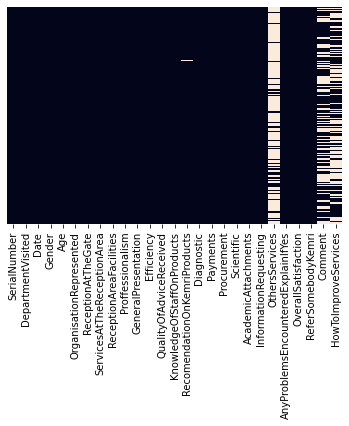

In [25]:
# Visualizing missing values in a heatmap

sns.heatmap(cust_satis_df.isnull(),yticklabels=False,cbar=False)

In [26]:
# checking the percentage of missing values per column

percent_missing = cust_satis_df.isnull().sum() / len(cust_satis_df)

percent_missing

SerialNumber                          0.000000
DepartmentVisited                     0.000000
Date                                  0.000000
Gender                                0.000000
Age                                   0.000000
OrganisationRepresented               0.000000
ReceptionAtTheGate                    0.000000
ServicesAtTheReceptionArea            0.000000
ReceptionAreaFacilities               0.000000
Proffessionalism                      0.000000
GeneralPresentation                   0.000000
Efficiency                            0.000000
QualityOfAdviceReceived               0.000000
KnowledgeOfStaffOnProducts            0.000000
RecomendationOnKemriProducts          0.003367
Diagnostic                            0.000000
Payments                              0.000000
Procurement                           0.000000
Scientific                            0.000000
AcademicAttachments                   0.000000
InformationRequesting                 0.000000
OthersService

OtherServices column has half of its records

**Dealing with null values in OthersServices  column**

In [27]:
# investigating OtherServices column

cust_satis_df['OthersServices'].unique()

array([nan, '1', 'Others', 'Hiv lab', 'Food handling certificate',
       'Looking for a job', 'Visiting staff at administration',
       'Attachment', 'Visited a staff', 'Visiting hiv laboratory',
       'Consultation', 'Wanted to see a friend', 'Job vacancy',
       'Employment application', 'Introduction to our financial services',
       'Interview', 'Interviews', 'Job', 'Student assessment'],
      dtype=object)

In [28]:
# Replacing entries in the OthersServices with appropiate values

cust_satis_df['OthersServices'] = cust_satis_df['OthersServices'].replace(['Interviews', 'Hiv lab', 'Visiting hiv laboratory', 'Job vacancy', 'Job', 'Looking for a job', 'Introduction to our financial services', 'Visiting staff at administration', 'Visited a staff', 'Wanted to see a friend', 'Student assessment', '1'], ['Interview', 'Hiv lab services', 'Hiv lab services', 'Employment application', 'Employment application', 'Employment application', 'Financial services', 'Visitation', 'Visitation', 'Visitation', 'Attachment', 'Yes'])

In [29]:
# Checking unique values in the dataset

cust_satis_df['OthersServices'].unique()

array([nan, 'Yes', 'Others', 'Hiv lab services',
       'Food handling certificate', 'Employment application',
       'Visitation', 'Attachment', 'Consultation', 'Financial services',
       'Interview'], dtype=object)

In [30]:
# Checking value counts of unique values in the OthersServices column of the dataset

cust_satis_df['OthersServices'].value_counts()


Interview                    19
Yes                           9
Employment application        7
Visitation                    5
Others                        3
Attachment                    3
Hiv lab services              2
Consultation                  2
Food handling certificate     1
Financial services            1
Name: OthersServices, dtype: int64

In [31]:
# replacing null values with 'No' to signify the KEMRI customer was not intrested in other services

cust_satis_df['OthersServices'] = cust_satis_df['OthersServices'].fillna('No')


# Checking unique values to ensure null values have been replaced

cust_satis_df['OthersServices'].unique()

array(['No', 'Yes', 'Others', 'Hiv lab services',
       'Food handling certificate', 'Employment application',
       'Visitation', 'Attachment', 'Consultation', 'Financial services',
       'Interview'], dtype=object)

**Dealing with null values in RecomendationOnKemriProducts column**

In [32]:
# Previewing missing value in 'RecomendationOnKemriProducts'

null_Rec_Kem_prod = cust_satis_df[cust_satis_df['RecomendationOnKemriProducts'].isnull()]
null_Rec_Kem_prod

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
73,Kemri_74,Administration offices,2018-09-20,Male,22,Service provider,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Neutral,Neutral,Satisfied,NaN,0,0,0,0,0,0,No,No,Satisfied,Yes,They are not bad,By 20%


In [33]:
# Previewing unique entries in 'RecomendationOnKemriProducts '

cust_satis_df['RecomendationOnKemriProducts'].unique()

['Likely', 'Not sure', NaN, 'Unlikely']
Categories (3, object): ['Likely', 'Not sure', 'Unlikely']

In [34]:
# Previewing value counts of unique entries in 'RecomendationOnKemriProducts '

cust_satis_df['RecomendationOnKemriProducts'].value_counts(1)

Likely      0.908784
Not sure    0.081081
Unlikely    0.010135
Name: RecomendationOnKemriProducts, dtype: float64

- The missing value in 'RecomendationOnKemriProducts' shall be filled with most common response 'Likely' since 9/10 people had such a response

In [35]:
# Filling missing value in 'RecomendationOnKemriProducts' with most popular value 'Likely'

cust_satis_df['RecomendationOnKemriProducts'] = cust_satis_df['RecomendationOnKemriProducts'].fillna('Likely')

In [36]:
# Check to confirm null values have been removed from  RecomendationOnKemriProducts column

cust_satis_df['RecomendationOnKemriProducts'].isnull().sum()

0

The null value has been succefully replaced

**Dealing with null values in Comment column**

In [37]:
# Previewing random sample of 10 records from customer satisfaction dataset with no comment record

cust_satis_df[cust_satis_df['Comment'].isnull()].sample(10)

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
97,Kemri_98,Kemri central laboratories,2015-07-26,Female,28,Private university,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Hiv lab services,No,Satisfied,Yes,NaN,NaN
278,C60,Kemri kenyatta hospital based laboratories,2015-07-25,Female,23,Service provider,Neutral,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Likely,0,0,0,0,0,0,Employment application,No,Somewhat,Yes,NaN,Put more effort to add security guards
279,C61,Kemri kenyatta hospital based laboratories,2015-12-01,Male,25,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,Visitation,No,Satisfied,Yes,NaN,Provide centre of cphr with cameras for securi...
210,Kemri_211,Training center,2015-09-15,Male,27,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,No,No,Satisfied,Yes,NaN,NaN
5,Kemri_06,Research partners laboratory,2018-09-13,Female,30,Research partner organization,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,1,0,0,No,No,Extremely satified,Yes,NaN,NaN
203,Kemri_204,Training center,2015-09-15,Male,29,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,1,0,0,No,No,Satisfied,Yes,NaN,NaN
18,Kemri_19,Kemri central laboratories,2018-12-09,Male,40,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,1,0,0,No,No,Satisfied,Yes,NaN,NaN
74,Kemri_75,Kemri central laboratories,2015-05-28,Male,42,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Not sure,1,0,0,0,0,0,Others,No,Satisfied,Yes,NaN,"Provide more space in the reception ,reduce th..."
294,D32,Administration offices,2015-09-16,Male,30,Ministry of health,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,No,No,Extremely satisfied,Yes,NaN,NaN
66,Kemri_67,Training center,2015-08-25,Female,19,Ngo,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,1,0,No,No,Satisfied,Yes,NaN,Have an enclosed place for injecting patients


In [38]:
# Replacing the missing values in comments column with 'No comment provided' - indicating the customer left no comments in comments section

cust_satis_df['Comment'] = cust_satis_df['Comment'].fillna('No comment provided')

In [39]:
# Checking for any remaining null values in comments column

cust_satis_df['Comment'].isnull().sum()

0

- All null values in comments column have been succefully field

**Dealing with null values in HowToImproveServices  column**

In [40]:
# Replacing the missing values in HowToImproveServices column with 'No reccomendation provided' - indicating the customer left no reccomendations for improvement

cust_satis_df['HowToImproveServices'] = cust_satis_df['HowToImproveServices'].fillna('No reccomendation provided')



In [41]:
# Checking for any remaining null values in comments column

cust_satis_df['HowToImproveServices'].isnull().sum()

0

- All missing values in the 'HowToImproveServices' column have been succefully filled

### Dealing with outliers and anormalies

**Date column**

- From the data description the data was collected for this dataset was collected from 2016 - 2018. All the dates before or after 2018 shall be previewed and removed since there is no way to ascertain the source of that data

In [42]:
# Initializing last allowable date in the data frame

last_date = pd.Timestamp('2018-12-31')

# Initializing first allowable date in dataframe

first_date = pd.Timestamp('2016-01-01')

first_date

Timestamp('2016-01-01 00:00:00')

In [43]:
# Function to filter the records with dates outside  the described data collection dates in data description

def date_filter(val):
    if val > last_date or val < first_date:
        
        return True
    
    else:
        
        return False

In [44]:
# Getting the records with date anormalies

date_anormalies = cust_satis_df[cust_satis_df['Date'].apply(date_filter)]

# Sample of the records with anormalies

date_anormalies.sample()

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
136,Kemri_137,Kemri kenyatta hospital based laboratories,2015-09-29,Male,34,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,No,No,Satisfied,Yes,No comment provided,Provide the institution with cctv cameras for ...


In [45]:
# Getting the records withouth date anormalies

cust_satis_df1 = cust_satis_df[cust_satis_df['Date'].apply(date_filter) == False].reindex()

# Sample of the records without anormalies

cust_satis_df1.sample(10)

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
145,Kemri_146,Administration offices,2018-05-10,Female,39,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,No,No,Satisfied,Yes,No comment provided,No reccomendation provided
85,Kemri_86,Administration offices,2018-09-21,Male,45,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,No,No,Extremely satified,Yes,Keep it up,No reccomendation provided
65,Kemri_66,Administration offices,2018-09-24,Male,23,National technical training college,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Neutral,Neutral,Satisfied,Likely,0,0,0,0,1,0,No,No,Satisfied,Yes,No comment provided,No reccomendation provided
55,Kemri_56,Administration offices,2018-09-20,Male,30,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,1,0,0,0,No,No,Satisfied,Yes,No comment provided,They seem okay with me
5,Kemri_06,Research partners laboratory,2018-09-13,Female,30,Research partner organization,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,1,0,0,No,No,Extremely satified,Yes,No comment provided,No reccomendation provided
127,Kemri_128,Kemri kenyatta hospital based laboratories,2018-09-26,Male,26,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,No,No,Extremely satified,Yes,Service satisfaction 100%,Can be better
168,Kemri_169,Attachment,2018-03-10,Male,36,Public university,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,No,No,Satisfied,Yes,No comment provided,No reccomendation provided
191,Kemri_192,Administration offices,2018-02-10,Female,30,Public university,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,0,0,No,No,Satisfied,Yes,Services rendered are amicably encouraging,No reccomendation provided
45,Kemri_46,Kemri central laboratories,2018-06-21,Male,29,Ngo,Neutral,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,0,1,0,No,No,Satisfied,Yes,The compant should be giving refreshment servi...,By employing more professions
69,Kemri_70,Administration offices,2018-09-19,Female,22,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,0,0,1,1,1,No,No,Extremely satified,Yes,Cardial reception and educational-on-screen il...,Perhaps apply the skills of biometics at the r...


**Previewing unique records among categorical columns for any anormallys**

In [46]:
# categorical data variables

categ = cust_satis_df1.select_dtypes(include=[ 'category']).columns.to_list()


# preview categorical columns

categ


['Gender',
 'ReceptionAtTheGate',
 'ServicesAtTheReceptionArea',
 'ReceptionAreaFacilities',
 'Proffessionalism',
 'GeneralPresentation',
 'Efficiency',
 'QualityOfAdviceReceived',
 'KnowledgeOfStaffOnProducts',
 'RecomendationOnKemriProducts',
 'Diagnostic',
 'Payments',
 'Procurement',
 'Scientific',
 'AcademicAttachments',
 'InformationRequesting',
 'OverallSatisfaction',
 'ReferSomebodyKemri']

In [47]:
#  previewing unique values per categorical column for anormalies

for col in categ:
    print(f"""Column Name; {col} 
    {cust_satis_df1[col].unique()}
    """)

Column Name; Gender 
    ['Male', 'Female', '30']
Categories (3, object): ['30', 'Female', 'Male']
    
Column Name; ReceptionAtTheGate 
    ['Satisfied', 'Neutral']
Categories (2, object): ['Neutral', 'Satisfied']
    
Column Name; ServicesAtTheReceptionArea 
    ['Satisfied', 'Neutral', 'Dissatisfied']
Categories (3, object): ['Dissatisfied', 'Neutral', 'Satisfied']
    
Column Name; ReceptionAreaFacilities 
    ['Satisfied', 'Neutral', 'Dissatisfied']
Categories (3, object): ['Dissatisfied', 'Neutral', 'Satisfied']
    
Column Name; Proffessionalism 
    ['Satisfied', 'Neutral']
Categories (2, object): ['Neutral', 'Satisfied']
    
Column Name; GeneralPresentation 
    ['Satisfied', 'Neutral']
Categories (3, object): ['Dissatisfied', 'Neutral', 'Satisfied']
    
Column Name; Efficiency 
    ['Satisfied', 'Neutral']
Categories (2, object): ['Neutral', 'Satisfied']
    
Column Name; QualityOfAdviceReceived 
    ['Satisfied', 'Neutral', 'Dissatisfied']
Categories (3, object): ['Dissati

- There is an anormaly in the Gender column ("30") that needs to be dealt with


- There is also an anormally in the OverallSatisfaction column. One category 'Extremely satified' is misspelt and needs to be corrected

**Dealing with anormally in gender column**

In [48]:
# previewing unique values in the gender column

cust_satis_df1['Gender'].unique()

['Male', 'Female', '30']
Categories (3, object): ['30', 'Female', 'Male']

- There is an anornmally ('30') in the gender column which shall be previewed further

In [49]:
# converting gender columns from  categorical string column

cust_satis_df1['Gender'] = cust_satis_df1['Gender'].astype('object')

In [50]:
gender_anorm = cust_satis_df1[cust_satis_df1['Gender'] == '30']

gender_anorm

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
117,Kemri_118,Kemri central laboratories,2018-09-26,30,30,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,No,No,Extremely satified,Yes,Very good,Keep it up


- From previewing the anormally, it is evident that the client in place of gender inserted his/her age. The anormally shall be randomly replaced with either male or female

In [51]:
# initializing pseudo-random number generator

np.random.seed(1) 

# initializing a list of genders

gender = ['Male', 'Female']

# Boolean identification of the anormally

m = cust_satis_df1['Gender'].eq('30')

# locating the anormallly and replacing it with a random value from list of genders

cust_satis_df1.loc[m, 'Gender'] = np.random.choice(gender, size=m.sum())

# Previewing the anormally using its serial number 

cust_satis_df1[cust_satis_df1['SerialNumber'] == 'Kemri_118']

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices
117,Kemri_118,Kemri central laboratories,2018-09-26,Female,30,Service provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,1,0,0,0,0,0,No,No,Extremely satified,Yes,Very good,Keep it up


In [52]:
# Checking to confirm all anormalies have been dealt with

cust_satis_df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
# Re-converting gender columns from  string categorical  column

cust_satis_df1['Gender'] = cust_satis_df1['Gender'].astype('category')

cust_satis_df1.dtypes

SerialNumber                                  object
DepartmentVisited                             object
Date                                  datetime64[ns]
Gender                                      category
Age                                            int64
OrganisationRepresented                       object
ReceptionAtTheGate                          category
ServicesAtTheReceptionArea                  category
ReceptionAreaFacilities                     category
Proffessionalism                            category
GeneralPresentation                         category
Efficiency                                  category
QualityOfAdviceReceived                     category
KnowledgeOfStaffOnProducts                  category
RecomendationOnKemriProducts                category
Diagnostic                                  category
Payments                                    category
Procurement                                 category
Scientific                                  ca

- The client has been randomly assigned Female gender

**Dealing with anormallys in OverallSatisfaction column**

In [54]:
# previewing unique categories in OverallSatisfaction column

cust_satis_df1['OverallSatisfaction'].unique()


['Extremely satified', 'Satisfied', 'Somewhat', 'Extremely unsatisfied']
Categories (6, object): ['Extremely satified', 'Extremely satisfied', 'Extremely unsatisfied', 'Satisfied', 'Somewhat', 'Unsatissfied']

In [55]:
# converting OverallSatisfaction columns from  categorical string column

cust_satis_df1['OverallSatisfaction'] = cust_satis_df1['OverallSatisfaction'].astype('object')

In [56]:
# confirming categories in the OverallSatisfaction column

cust_satis_df1['OverallSatisfaction'].unique()

array(['Extremely satified', 'Satisfied', 'Somewhat',
       'Extremely unsatisfied'], dtype=object)

In [57]:
# correcting mispelt category in OverallSatisfaction column

cust_satis_df1['OverallSatisfaction'] = cust_satis_df1['OverallSatisfaction'].replace(['Extremely satified'], ['Extremely satisfied'])

In [58]:
# preview unique values in column to confirm the anormally has been successfully removed

cust_satis_df1['OverallSatisfaction'].unique()

array(['Extremely satisfied', 'Satisfied', 'Somewhat',
       'Extremely unsatisfied'], dtype=object)

In [59]:
# Re_converting OverallSatisfaction columns from  categorical string column

cust_satis_df1['OverallSatisfaction'] = cust_satis_df1['OverallSatisfaction'].astype('object')

- Anormally has been succefully dealt with

**Age  column**

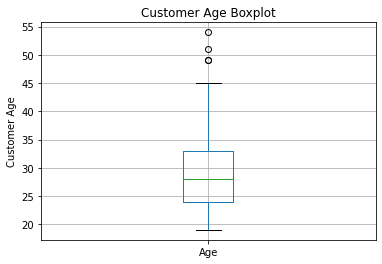

In [60]:
# boxplot of age column

cust_satis_df1.boxplot(column= 'Age')
plt.ylabel('Customer Age')
plt.title('Customer Age Boxplot')
plt.show()

In [61]:
# First quartile\
Q1 = cust_satis_df1['Age'].quantile(0.25)

# Second Quartile

Q3 = cust_satis_df1['Age'].quantile(0.75)

# interquartile range

IQR = Q3 - Q1

# IQR
IQR

9.0

In [62]:
# whisker width

whisker_width = 1.5


# get the outlier records in dataset

age_outliers = cust_satis_df1[(cust_satis_df1['Age'] < (Q1 - (whisker_width*IQR))) | (cust_satis_df1['Age'] > (Q3 + (whisker_width*IQR)))]


# records with Age outliers

age_outliers['Age'].to_list()

[49, 54, 49, 51]

In [63]:
# list of age outliers

age_outliers['Age'].to_list()

[49, 54, 49, 51]

- From the boxplot most of the customers to KEMRI were aged between 24-32 years. 
- The outliers in age were those ages greater than 45. 
- From the array of the ages that were classified as outliers from the boxplot indicates most KEMRI customers are aged below 45 years.

## Feature engineering

In [64]:
# Extracting day of week from date column

cust_satis_df1['DayOfWeek'] = pd.DatetimeIndex(cust_satis_df1['Date']).day_name()

# Extracting month from date column

cust_satis_df1['Month'] = pd.DatetimeIndex(cust_satis_df1['Date']).month_name()

# extracting the year from date column

cust_satis_df1['Year'] = pd.DatetimeIndex(cust_satis_df1['Date']).year


In [65]:
# previewing the data frame for year, month and Dayfweek extracts from the date column

cust_satis_df1[['Date', 'Year', 'Month', 'DayOfWeek']].sample(10)

,Date,Year,Month,DayOfWeek
162,2018-01-10,2018,January,Wednesday
81,2018-09-20,2018,September,Thursday
108,2018-01-10,2018,January,Wednesday
147,2018-10-25,2018,October,Thursday
124,2016-04-25,2016,April,Monday
184,2018-09-25,2018,September,Tuesday
177,2018-01-10,2018,January,Wednesday
111,2018-01-10,2018,January,Wednesday
62,2018-09-20,2018,September,Thursday
67,2018-09-19,2018,September,Wednesday


## Data analysis

### Previewing Categorical variables

In [66]:
# Function to plot Pie-Charts for all categorical variables in the dataframe

def pie_charts_CategVar(df_pie, n): # df_pie takes in the dataframe, n specifies the number of columns in the grid
    
    # Getting all the column names in the dataframe
    
    cols = []
    for i in df_pie:
        cols.append(i)
    
    # Isolating the categorical variable names from cols to categ_cols
    
    categ_cols = []
    for i in cols:
        if (cust_satis_df1[i].dtype.name) == 'category':
            categ_cols.append(i)
    
    # Specifying the size of main plot and subplots and title of plot
    
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle("Pie Charts for Categorical Variables in the Dataframe", fontsize= 30, y=0.95)
    
    # number of columns, as inputted while calling the function
    
    ncols = n
    
    # calculating number of rows
    
    nrows = len(categ_cols) // ncols + (len(categ_cols) % ncols > 0)
    
    # looping  through the length of 'categ_cols' and keep track of index
    
    for n, i in enumerate(categ_cols):
        ax = plt.subplot(nrows, ncols, n + 1) # adding a new subplot iteratively using nrows and ncols 
        cust_satis_df1.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax, fontsize= 14, figsize=(25,25)) # filtering df and plot 'i' on the new subplot axis
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
plt.show()

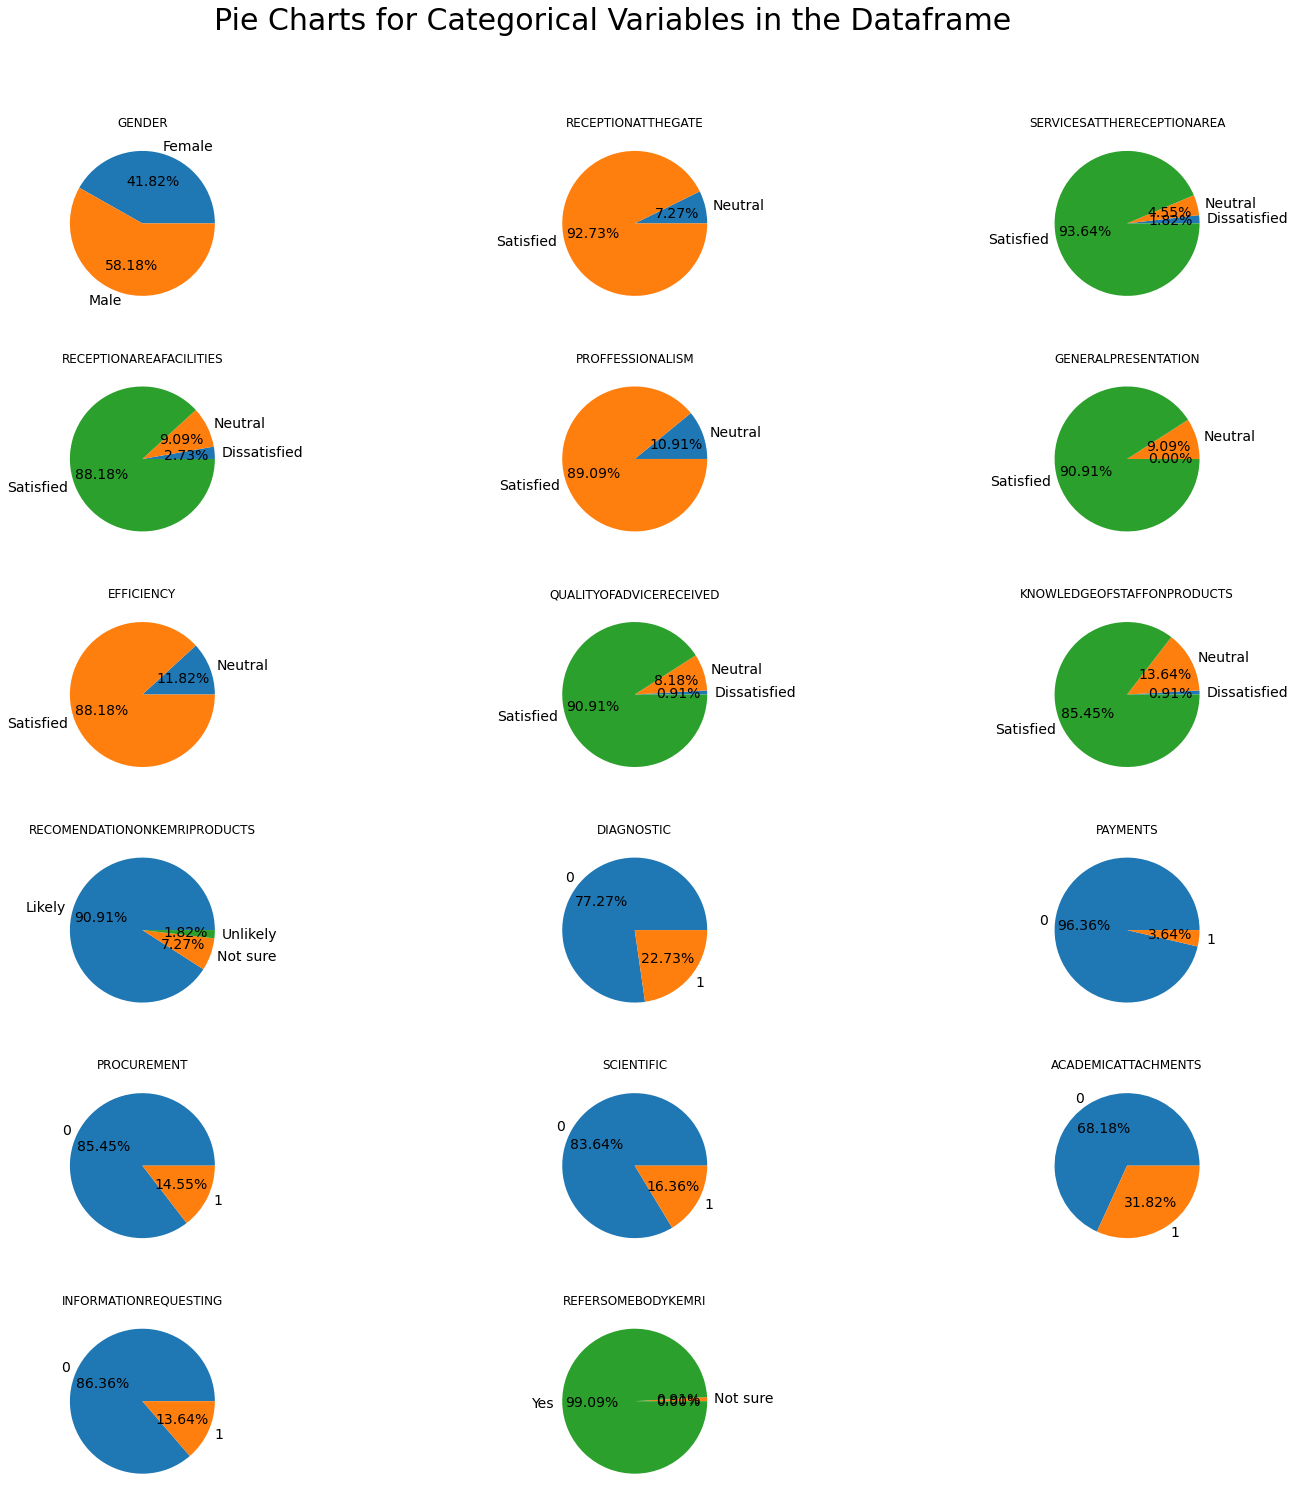

In [67]:
# pie plots of different categorical varaibles

pie_charts_CategVar(cust_satis_df1,3)

### 1. Who are the clientele of KEMRI ?

<AxesSubplot:xlabel='Age', ylabel='Count'>

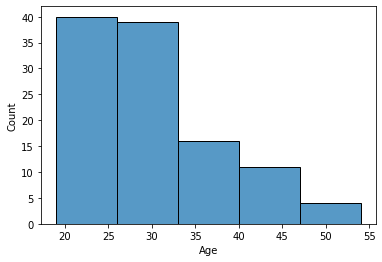

In [68]:
# histogram plot to visualize age distribution of KEMRI Clients

sns.histplot(data=cust_satis_df1, x= "Age", bins = 5)

<AxesSubplot:ylabel='None'>

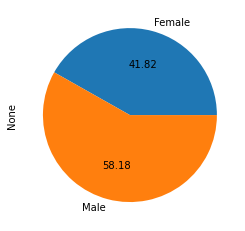

In [69]:
# pie chart to see the genders of KEMRI  customers

cust_satis_df1.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

In [70]:
# Previewing the Organization clientel of KEMRI visitors.

cust_satis_df1['OrganisationRepresented'].value_counts()

Service provider                       52
Public university                      19
Ngo                                    11
Did not disclose                        9
Research partner organization           7
Private university                      6
National technical training college     3
Self                                    2
Moh                                     1
Name: OrganisationRepresented, dtype: int64

In [71]:
# value counts of years

cust_satis_df1['Year'].value_counts()

2018    99
2016    11
Name: Year, dtype: int64

**Insights**

- From the Age histogram plot most of KEMI customers are youth aged below 35 years and over half (58.18%) of all KEMRI customers are Male


- There were 9 organizations (excluding those that did not disclose information and those who came as themselves) among customers that visited KEMRI. 


- The top three organizations that frequented KEMRI were:
    - Service provider 52 visits
    - Public university 19 visits
    - Ngo 11 visits

### 2.What are the  deparetments  of KEMRI that were visited ? How oftenly were these departments visited?

In [72]:
# Checking the departments visited and frequency of visits by customers at Kemri 

cust_satis_df1['DepartmentVisited'].value_counts()

Administration offices                        34
Kemri central laboratories                    32
Kemri kenyatta hospital based laboratories    30
Research partners laboratory                   6
Attachment                                     3
Animal facilities                              1
Pan african hub of infectious diseases         1
Phd students internship                        1
Kemri sacco                                    1
Training center                                1
Name: DepartmentVisited, dtype: int64

**insights**

- A total of 10 KEMRI departments recieved customers

- The top three most visited departments at KEMRI were:

    - Administration offices 34 visits
    - Kemri central laboratories 32 visits
    - Kemri kenyatta hospital based laboratories 30 visits
    
    
- These three departments accounted for over 80% of all customer visits to KEMRI

### 3. What fraction of the customers fell satisfied, Disatisfied or Neutral?

<AxesSubplot:>

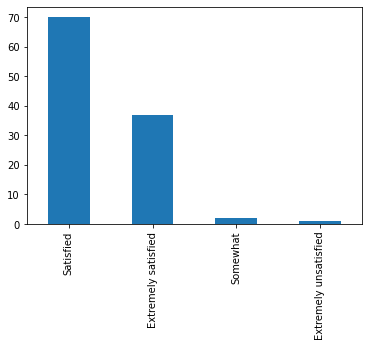

In [73]:
# Bar chart of to see overall satisfction of different customers

cust_satis_df1['OverallSatisfaction'].value_counts().plot(kind='bar')

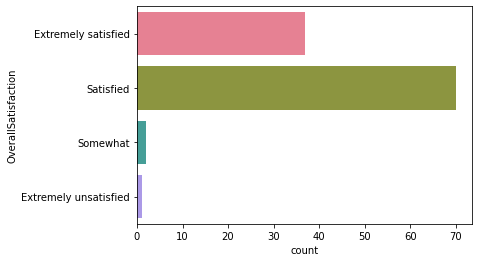

In [74]:
# countplot to compare overall satisfaction of customers

ax = sns.countplot(y="OverallSatisfaction", data=cust_satis_df1, palette="husl")

**Insights**

- From the count plot, most KEMRi customers were either satissfied or extremely satisfied. A few of these customers were extremly unsatisfied

### 4. What were the best and worst performing sectors per department? How did different departments perform relative to each other?

**Encoding categorical variables**


- The columns for the different sections/sectors (ReceptionAtTheGate', 'ServicesAtTheReceptionArea', 'ReceptionAreaFacilities', 'Proffessionalism', 'GeneralPresentation', 'Efficiency', 'QualityOfAdviceReceived', 'KnowledgeOfStaffOnProducts') rated for the different departements shall be encoded. 


- The categories listed below shall be assigned numeric values ranging from 1-5 to determine the level of customer satisfaction in ascending order. These values shall be used to judge the performance of different sectors for different departments ata KEMRI


- There are three rating categories for these sectors rated for different departments:
    - Satisfied
    - Neutral
    - Dissatisfied
    
    
- The ratings shall be aasigned as follows;
    - Satsfied -5
    - Neutral - 3
    - Dissatisfied -1

In [75]:
# encoding function

def encode(val):
    if val == 'Dissatisfied':
        return 1
    
    elif val ==  'Neutral':
        return 3
    
    elif val ==  'Satisfied':
        return 5

In [76]:
# Columns to label encode

columns = ['ReceptionAtTheGate', 'ServicesAtTheReceptionArea', 'ReceptionAreaFacilities', 'Proffessionalism', 'GeneralPresentation', 'Efficiency', 'QualityOfAdviceReceived', 'KnowledgeOfStaffOnProducts']


In [77]:
# copy of data frame to be enecoded

cust_satis_encoded = cust_satis_df1.copy()

In [78]:
# encoding selected categorical variables

for col in columns:
    cust_satis_encoded[col] = cust_satis_encoded[col].apply(encode)
    

In [79]:
# preview encoded columns

cust_satis_encoded.head()

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices,DayOfWeek,Month,Year
1,Kemri_02,Research partners laboratory,2018-09-14,Male,26,Service provider,5,5,5,5,5,5,5,5,Likely,0,0,0,0,0,1,No,No,Extremely satisfied,Yes,Good reception and services,No reccomendation provided,Friday,September,2018
2,Kemri_03,Administration offices,2018-09-14,Female,40,Service provider,5,5,5,5,5,5,5,5,Likely,0,0,0,0,0,1,No,No,Extremely satisfied,Yes,No comment provided,No reccomendation provided,Friday,September,2018
5,Kemri_06,Research partners laboratory,2018-09-13,Female,30,Research partner organization,5,5,5,5,5,5,5,5,Likely,0,0,0,1,0,0,No,No,Extremely satisfied,Yes,No comment provided,No reccomendation provided,Thursday,September,2018
7,Kemri_08,Kemri central laboratories,2018-09-13,Female,24,Service provider,5,5,5,5,5,5,5,5,Likely,0,0,0,0,0,0,Yes,Yes,Satisfied,Yes,Big up,Enough signs to be made for all especially cdg...,Thursday,September,2018
8,Kemri_09,Administration offices,2018-08-13,Male,40,Service provider,5,5,5,3,3,3,5,5,Likely,0,1,0,0,0,0,No,Yes,Somewhat,Not sure,Other than lack of direct person to handle my ...,No reccomendation provided,Monday,August,2018


- Columns have been encoded appropiately

In [80]:
# changing data types of encoded columns from categories to numerical

cust_satis_encoded[columns] = cust_satis_encoded[columns].astype('int64')

In [81]:
# Creating a column of the average rating of the department from ratings of the different sectors in department
# by a client who visited KEMRI

cust_satis_encoded['AverageRatingPerSector'] = cust_satis_encoded[columns].mean(axis = 1)
cust_satis_encoded.sample(10)

,SerialNumber,DepartmentVisited,Date,Gender,Age,OrganisationRepresented,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,RecomendationOnKemriProducts,Diagnostic,Payments,Procurement,Scientific,AcademicAttachments,InformationRequesting,OthersServices,AnyProblemsEncounteredExplainIfYes,OverallSatisfaction,ReferSomebodyKemri,Comment,HowToImproveServices,DayOfWeek,Month,Year,AverageRatingPerSector
281,C63,Kemri kenyatta hospital based laboratories,2016-05-02,Male,33,Ngo,5,5,5,5,3,3,5,5,Likely,0,0,0,0,0,0,Visitation,No,Satisfied,Yes,Communicated with receptionist and guards well,Need cctv cameras,Monday,May,2016,4.50
96,Kemri_97,Kemri kenyatta hospital based laboratories,2018-09-14,Female,24,Research partner organization,5,5,5,5,5,5,5,5,Likely,0,0,0,0,1,0,No,No,Extremely satisfied,Yes,No comment provided,The conference room is too cold,Friday,September,2018,5.00
193,Kemri_194,Research partners laboratory,2018-02-09,Female,29,Public university,5,5,5,5,5,5,5,5,Likely,0,0,0,0,0,0,Yes,No,Extremely satisfied,Yes,No comment provided,No reccomendation provided,Friday,February,2018,5.00
195,Kemri_196,Kemri central laboratories,2018-09-26,Male,27,Public university,5,5,5,5,5,5,5,5,Likely,0,0,1,1,0,0,No,No,Extremely satisfied,Yes,No comment provided,No reccomendation provided,Wednesday,September,2018,5.00
98,Kemri_99,Phd students internship,2018-09-21,Female,22,Service provider,5,5,5,5,5,5,5,3,Likely,0,0,0,0,0,0,Yes,No,Extremely satisfied,Yes,No comment provided,I loved yur staff treated me so well,Friday,September,2018,4.75
57,Kemri_58,Administration offices,2018-09-20,Male,28,Service provider,5,5,5,5,5,5,5,5,Likely,0,0,1,0,0,0,No,No,Satisfied,Yes,No comment provided,No reccomendation provided,Thursday,September,2018,5.00
113,Kemri_114,Kemri kenyatta hospital based laboratories,2018-09-27,Female,30,Service provider,5,5,5,5,5,5,5,5,Likely,0,0,0,0,0,0,No,No,Extremely satisfied,Yes,No comment provided,The services we received satisfied us,Thursday,September,2018,5.00
47,Kemri_48,Kemri central laboratories,2016-05-25,Male,22,Service provider,5,5,5,5,5,5,5,5,Likely,1,0,0,1,1,0,No,No,Satisfied,Yes,We never had enough time to get the enough inf...,Using projections or exhibition practices,Wednesday,May,2016,5.00
8,Kemri_09,Administration offices,2018-08-13,Male,40,Service provider,5,5,5,3,3,3,5,5,Likely,0,1,0,0,0,0,No,Yes,Somewhat,Not sure,Other than lack of direct person to handle my ...,No reccomendation provided,Monday,August,2018,4.25
54,Kemri_55,Administration offices,2018-09-20,Male,37,Service provider,5,5,5,5,5,5,5,3,Likely,0,0,1,0,0,0,No,No,Satisfied,Yes,No comment provided,No reccomendation provided,Thursday,September,2018,4.75


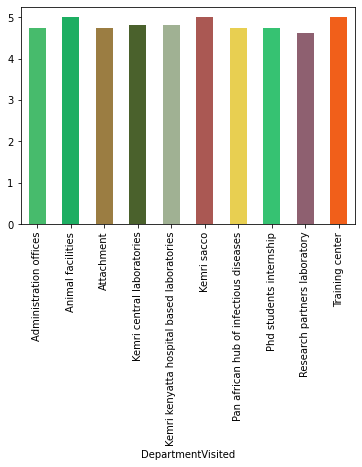

In [82]:
# bar plot of departments versus their average rating
import random

# Number of bars in bar plot

bar_count = len(cust_satis_encoded['DepartmentVisited'].unique().tolist())


# Hexadecimal alphabets

hexadecimal_alphabets = '0123456789ABCDEF'

# colors to be assigned to bars in bar plots

colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(bar_count)]

# assigning colors to different bars in barplot

for i in range(len(colors)):
    cust_satis_encoded.groupby(['DepartmentVisited'])['AverageRatingPerSector'].mean().plot(kind = 'bar', color = colors)
    

- From the bar chart above all departments had a rating of over 4.5/5.0 from customers

In [83]:
# Getting the averegae sector rating per department 

av_rating = cust_satis_encoded.groupby(['DepartmentVisited'])[columns].mean()
av_rating.loc['MeanPerRatedSector'] = av_rating.mean(axis = 0)
av_rating['MeanPerDepartment'] = av_rating.mean(axis = 1)

# av_rating = av_rating.reset_index()
av_rating

,ReceptionAtTheGate,ServicesAtTheReceptionArea,ReceptionAreaFacilities,Proffessionalism,GeneralPresentation,Efficiency,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts,MeanPerDepartment
DepartmentVisited,,,,,,,,,
Administration offices,4.941176,5.000000,4.764706,4.647059,4.764706,4.588235,4.588235,4.588235,4.735294
Animal facilities,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Attachment,5.000000,5.000000,5.000000,5.000000,4.333333,5.000000,4.333333,4.333333,4.750000
Kemri central laboratories,4.750000,4.937500,4.625000,4.875000,4.875000,4.875000,4.875000,4.750000,4.820312
Kemri kenyatta hospital based laboratories,4.866667,4.533333,4.666667,4.800000,4.866667,4.800000,4.933333,5.000000,4.808333
Kemri sacco,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Pan african hub of infectious diseases,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.750000
Phd students internship,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.750000
Research partners laboratory,4.666667,4.666667,4.666667,4.666667,4.666667,4.666667,5.000000,4.000000,4.625000


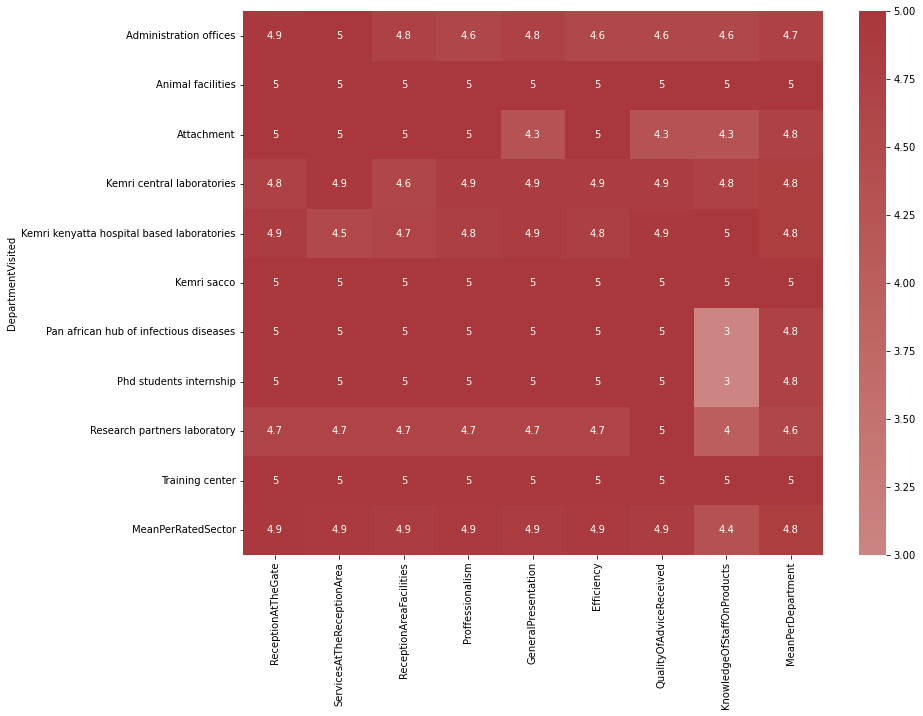

In [84]:
# Correlation plot of department vs the rating of each sector

fig, ax = plt.subplots(figsize=(13,10))  
sns.heatmap(av_rating, annot=True,  center=0, cmap='vlag');

In [85]:
# Function to select all the department sectors and for the different departments with a mean rating less than 4.5/5


def rating_selector(val):
    return val < 4.5

In [86]:
# applying the filter to average rating table

ratings_less_4_5 = av_rating[av_rating.apply(rating_selector)]

# Delete rows containing either 100% NaN Values
perc = 100.0 # Here N is 75
min_count =  int(((100-perc)/100)*ratings_less_4_5.shape[1] + 1)
ratings_less_4_5 = ratings_less_4_5.dropna( axis=0, 
                    thresh=min_count)

ratings_less_4_5 = ratings_less_4_5.dropna( axis=1, 
                    thresh=min_count)
ratings_less_4_5

,GeneralPresentation,QualityOfAdviceReceived,KnowledgeOfStaffOnProducts
DepartmentVisited,,,
Attachment,4.333333,4.333333,4.333333
Pan african hub of infectious diseases,NaN,NaN,3.000000
Phd students internship,NaN,NaN,3.000000
Research partners laboratory,NaN,NaN,4.000000
MeanPerRatedSector,NaN,NaN,4.367157


- From the heatmap and table above, three sectors had ratings below 4.5/5.0 in four different departments

    - General presentation
    - Quality of Advice Recieved and
    - knowledge of staff on Products
    
    
 - The worst rating of any sector was 3.00 in the knowledge of staffon products for two departments at KEMRI

**Insights**

- From tables above, all departments on average using the rating metric across all its sectors rated highly (over 4.5 / 5)


- All sectors across all departments aside aside for three sectors scored using the created rating metric  (over 4.5 / 5)


- The attachment department had three sectors rating below 4.5/5.0
    - General presentation
    - Quality of Advice Recieved and
    - knowledge of staff on Products
    

- Staff knowledge of products in the Pan African Hub of Infectious Diseases and Phd Students Internshipdepartments is very wanting. They scored the lowest rating of 3.0/5.0


### 5.What are the main services sought by KEMRI customer?

In [87]:
# Function to plot Pie-Charts for all categorical variables in the dataframe

def services_pie_charts(df_pie, n): # df_pie takes in the dataframe, n specifies the number of columns in the grid
    
    # Columns indicating services offered by KEMRI
    
    columns =  ['Diagnostic', 'Payments', 'Procurement', 'Scientific', 'AcademicAttachments', 'InformationRequesting', 'OthersServices']
    
    # Specifying the size of main plot and subplots and title of plot
    
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle("Pie Charts for Various KEMRI Services", fontsize= 30, y=0.95)
    
    # number of columns, as inputted while calling the function
    
    ncols = n
    
    # calculating number of rows
    
    nrows = len(columns) // ncols + (len(columns) % ncols > 0)
    
    # looping  through the length of 'categ_cols' and keep track of index
    
    for n, i in enumerate(columns):
        ax = plt.subplot(nrows, ncols, n + 1) # adding a new subplot iteratively using nrows and ncols 
        cust_satis_df1.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax, fontsize= 14, figsize=(25,25)) # filtering df and plot 'i' on the new subplot axis
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
plt.show()

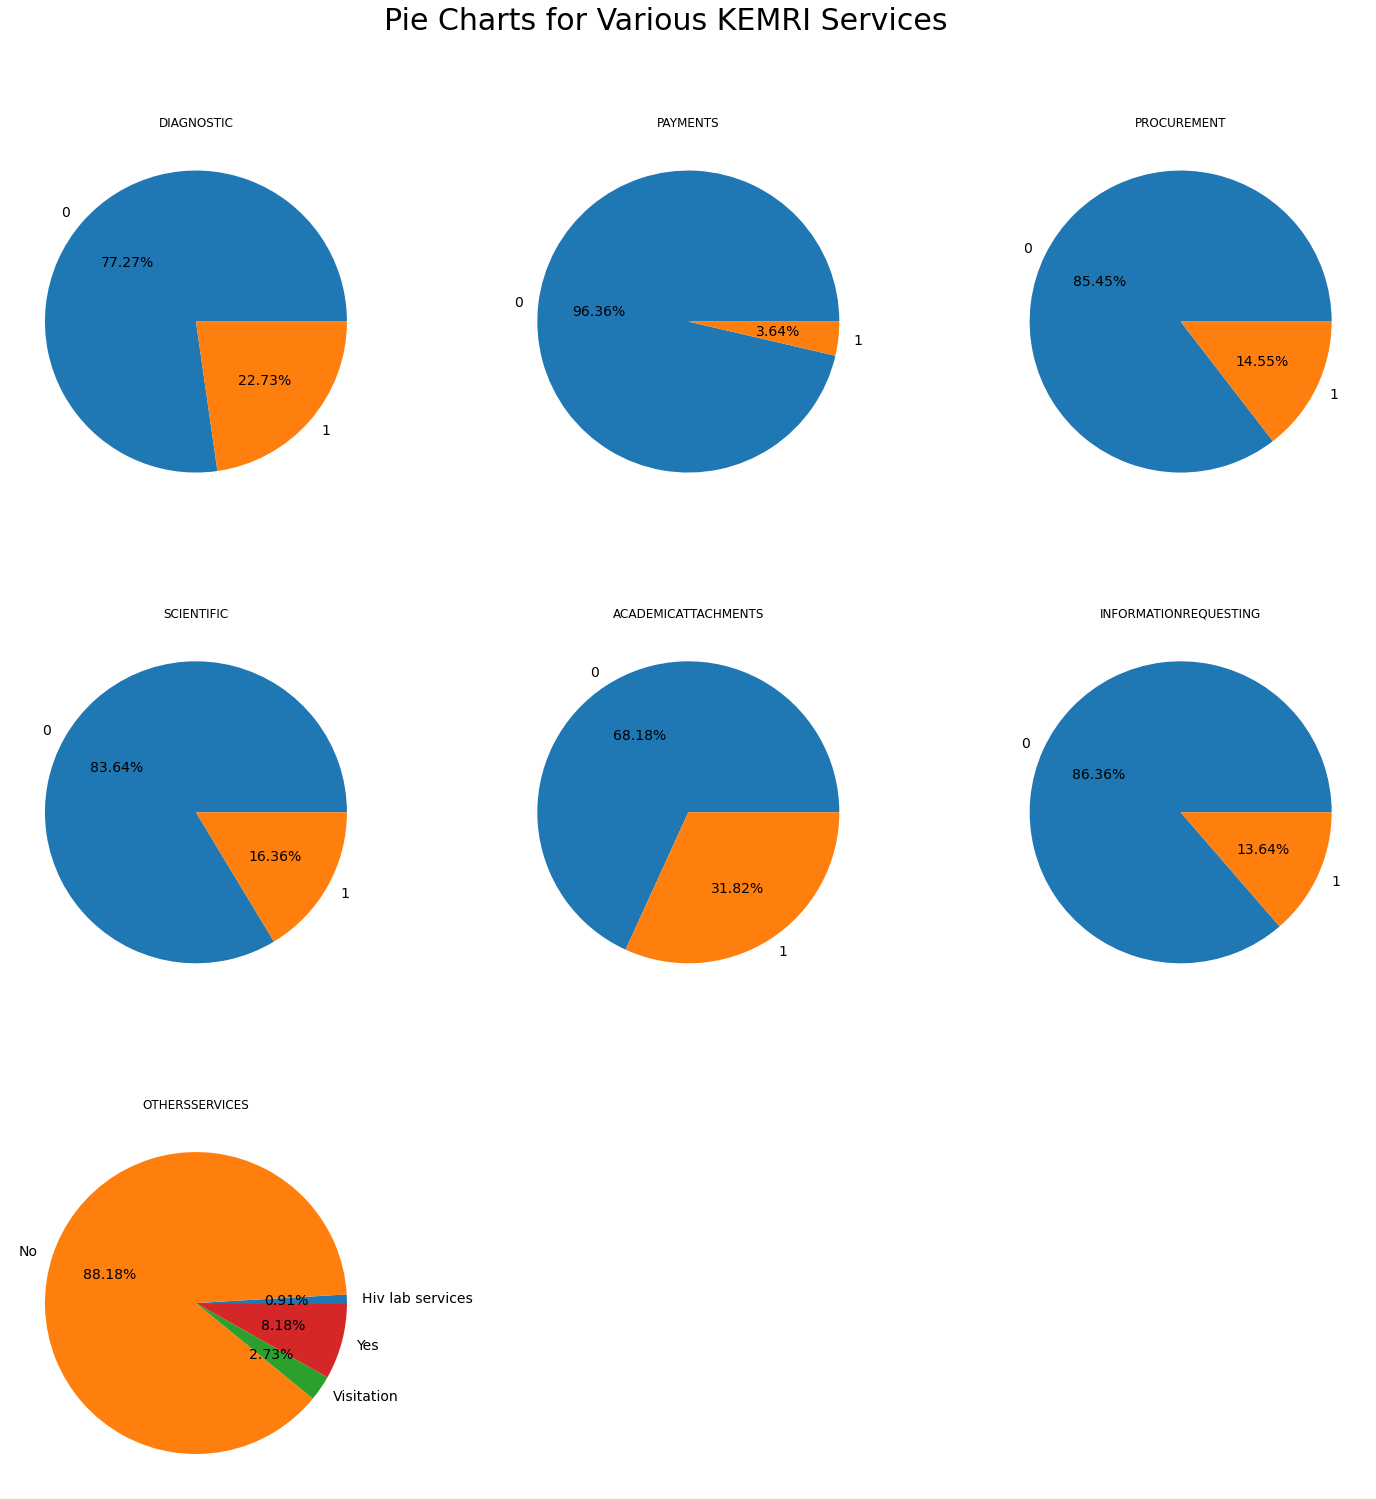

In [88]:
# pie plots of different categorical varaibles

services_pie_charts(cust_satis_df1,3)

In [89]:
columns = ['Diagnostic', 'Payments', 'Procurement', 'Scientific', 'AcademicAttachments', 'InformationRequesting', 'OthersServices']

for col in columns:
    print(f"""Column: {col}, {cust_satis_df1[col].value_counts(normalize=True) }
    """)

Column: Diagnostic, 0    0.772727
1    0.227273
Name: Diagnostic, dtype: float64
    
Column: Payments, 0    0.963636
1    0.036364
Name: Payments, dtype: float64
    
Column: Procurement, 0    0.854545
1    0.145455
Name: Procurement, dtype: float64
    
Column: Scientific, 0    0.836364
1    0.163636
Name: Scientific, dtype: float64
    
Column: AcademicAttachments, 0    0.681818
1    0.318182
Name: AcademicAttachments, dtype: float64
    
Column: InformationRequesting, 0    0.863636
1    0.136364
Name: InformationRequesting, dtype: float64
    
Column: OthersServices, No                  0.881818
Yes                 0.081818
Visitation          0.027273
Hiv lab services    0.009091
Name: OthersServices, dtype: float64
    


**Insights**

- The top five most sought services by customers at KEMRI are:
     
        1. Accademic attachments =  31.82%
        2. Diagnostic Sevices = 22.73
        3. Scientific services = 16.36%
        4. Procurement services = 14.55%
        5. Information requesting services = 13.64%

### 6. What are some of the problems if any encoutered by customers?

In [90]:
# Previewing unique records in AnyProblemsEncounteredExplainIfYe column

cust_satis_df['AnyProblemsEncounteredExplainIfYes'].unique().tolist()

['No',
 'Yes',
 'Yes, i was reffered to kemri headquaters',
 'Yes delay of payments it is abot slow',
 'Yes, time at the institute from start',
 'Yes. excellent',
 'Yes-a lot of time taken in pharmacy',
 'Yes. my attachment should end on july according to my calling letter.why is it up to end of september? and we should go back to school.if so,we should be paid for august for school pocket money.']

**Insights**

- From analysing the responses of customers when asked if the encoutered any problems, the following problems were identified:
    
    1. Payment delays
    2. Time delay in service provision
    3. Lack of clear information provided to clients

### 7.What are the comments by the KEMRI customers?

- Here the comments of customers are analyzed to see what are the affecting them

In [91]:
# Removing records where the customer did not provide any comment

cust_satis_df2 = cust_satis_df1[cust_satis_df1['Comment'] != 'No comment provided'].reset_index()

In [92]:
# comments

comments = cust_satis_df2['Comment']

In [93]:
# sample of 10 customer comments

sample_comments = comments[:10] 

sample_comments

0                          Good reception and services
1                                               Big up
2    Other than lack of direct person to handle my ...
3                        Looking forward to come again
4               The services are extremely encouraging
5                              Services are satisfying
6                                            Satisfied
7    I am satisfied and happy more with the assista...
8                                            Satisfied
9                      Improve facilities at reception
Name: Comment, dtype: object

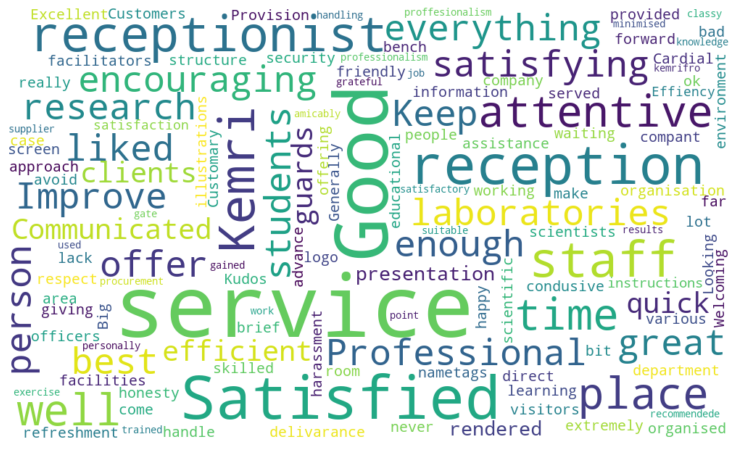

In [94]:
# Plotting wordcloud

# Specfying stopwords

stopwords = set(STOPWORDS)

# Specifying the words to be plotted

allWords = ' '.join([comments for comments in comments])


# plotting wordcloud

wordCloud = WordCloud(width = 1000, height = 600, random_state = 43, max_font_size = 119,
                    background_color='white',stopwords = stopwords).generate(allWords)

plt.figure( figsize = (16,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
     

In [95]:
# Specifying stopwords to be removed

stop = set(STOPWORDS)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

cust_satis_df2["Comment_Without_stopwords"] = cust_satis_df2["Comment"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# getting top 20 most used words in customer coments

Counter(" ".join(cust_satis_df2["Comment_Without_stopwords"]).split()).most_common(20)

[('services', 10),
 ('The', 8),
 ('Good', 6),
 ('reception', 5),
 ('Satisfied', 5),
 ('I', 4),
 ('staff', 4),
 ('good', 4),
 ('They', 4),
 ('well', 3),
 ('time', 3),
 ('place', 3),
 ('receptionist', 3),
 ('attentive', 3),
 ('everything', 2),
 ('encouraging', 2),
 ('Services', 2),
 ('satisfying', 2),
 ('offer', 2),
 ('liked', 2)]

- From the word count and word cloud the most common words in customer comments were Service, Satisfied, Good, Receptionist, kemri, Attentive, and reception

In [96]:
# sentiment analyzer

sentiments = SentimentIntensityAnalyzer()

# applying sentiment analyzer to comment column calculate the sentiment scoes (Neutral, Positive, Negative and Compound)

cust_satis_df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in cust_satis_df2["Comment"]]
cust_satis_df2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in cust_satis_df2["Comment"]]
cust_satis_df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in cust_satis_df2["Comment"]]
cust_satis_df2["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in cust_satis_df2["Comment"]]

# sample of 10 comments with their sentiment scores
cust_satis_df2[["Comment", "Positive", "Negative", "Neutral", "Compound"]].sample(10)


,Comment,Positive,Negative,Neutral,Compound
11,Professional delivarance of services,0.000,0.000,1.000,0.0000
28,Provision of nametags with kemri logo to stude...,0.133,0.315,0.552,-0.5106
40,Effiency and proffesionalism on point,0.000,0.000,1.000,0.0000
48,Good services,0.744,0.000,0.256,0.4404
1,Big up,0.000,0.000,1.000,0.0000
56,Satisfied,1.000,0.000,0.000,0.4215
8,Satisfied,1.000,0.000,0.000,0.4215
18,We have been served with a lot of respect,0.307,0.000,0.693,0.4767
12,The presentations and honesty of staff was sat...,0.508,0.000,0.492,0.7351
25,Satisfied with the officers approach,0.412,0.000,0.588,0.4215


In [97]:
# Getting values of compound sentiment scores

score = cust_satis_df2["Compound"].values

# Initializing an empty sentiment list

sentiment = []

# For loop to bin the scores into either positive, negative or neutral

for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
# Creating sentiment column

cust_satis_df2["Sentiment"] = sentiment

# sample of 10 records with comment, compound sentiment score and sentiment

cust_satis_df2[["Comment", "Compound", "Sentiment"]].sample(10)

,Comment,Compound,Sentiment
17,The compant should be giving refreshment servi...,0.3400,Positive
41,They are attentive to their clients and offer ...,0.4404,Positive
32,Communicated with receptionist and guards well,0.2732,Positive
40,Effiency and proffesionalism on point,0.0000,Neutral
8,Satisfied,0.4215,Positive
49,I am personally grateful for the knowledge i g...,0.6808,Positive
37,They are attentive to their clients,0.0000,Neutral
43,Quick services with trained staff,0.0000,Neutral
48,Good services,0.4404,Positive
42,The exercise used minimised time for the resul...,0.0000,Neutral


<AxesSubplot:ylabel='None'>

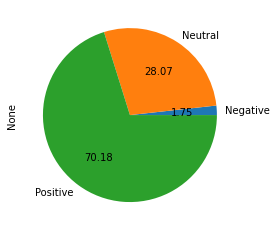

In [98]:
# pie chart to see the genders of KEMRI  customers

cust_satis_df2.groupby('Sentiment').size().plot(kind='pie', autopct='%.2f')

- 7 in 10 comments from customers is positive

In [99]:
# specifying stopwords

stop = set(stopwords)

# function to remove stopwords

def remove_stopword(word):
    return word not in stop

# lematizing

Lemma = WordNetLemmatizer()

# Stemming
stemmer = SnowballStemmer("english")

In [100]:
# converting all comments to lower case

cust_satis_df2['Comment'] = cust_satis_df2['Comment'].str.lower().str.split()

# removing stop words from comments column
cust_satis_df2['Comment'] = cust_satis_df2['Comment'].apply(lambda x : [item for item in x if item not in stop])

In [101]:
# Cleaning customer comments

cust_satis_df2['cleaned_comments'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line))
for line in lists]).strip() for lists in cust_satis_df2['Comment']] 

In [102]:
# Specifying vectorizer

vectorizer = TfidfVectorizer(stop_words='english', analyzer = "word", max_features = 2500)

# Applying vecyorizer on cleaned comments

model = vectorizer.fit_transform(cust_satis_df2['cleaned_comments'].str.upper())



In [103]:
# clustering to make sense of comments

km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)
km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster %d:" %i,end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind],end='')
    print()    

cluster 0: good attentive receptionist communicated guard time kemri presentation bad liked
cluster 1: satisfied officer approach area assistance provided happy reception friendly generally
cluster 2: best satisfactory offering research place kemri service gate gained friendly
cluster 3: service great good encouraging rendered staff satisfaction satisfying brief delivarance
cluster 4: reception improve facility bit make room advance cardial bench illustration


**Insights**

- From the word count and word cloud analysis, most customers commented on services, staff, reception and the virtues at KEMRI.

- From sentiment piechart, an overwhelming number of customers have positive things to say about KEMRI

- From the clusters the followingobservations were drawn:

    - customers were enthralled with services at the reception and gate areas. 
    - KEMRI staff were praised for good and professional service delivery and their sensitivity to customer needs
    - Customers also noted that service delivery was quick and effcient


### 8.What were the recommendations by KEMRI Customers?

In [104]:
# get reccomedations of Customers to KEMRI excluding those that did not provde any reccomendations

reccomendations = cust_satis_df1['HowToImproveServices'][cust_satis_df1['HowToImproveServices'] != 'No reccomendation provided']



In [105]:
# sample of 10 customer reccomendations

sample_reccomendations = reccomendations[:10] 

sample_reccomendations

7     Enough signs to be made for all especially cdg...
22    Purchase disposal cups for visitors to use for...
24                                    Services are fair
30        Provide them with ict equipment i.e computers
33      Provide more laboratory chairs to avoid fatigue
35    Improve on hospitality on the labs to make cli...
37          Investing more in young fresh digital minds
39    By doing more research on issues like hiv/aids...
41                           Enlarging laboratory rooms
42    By providing more facilities to carry out rese...
Name: HowToImproveServices, dtype: object

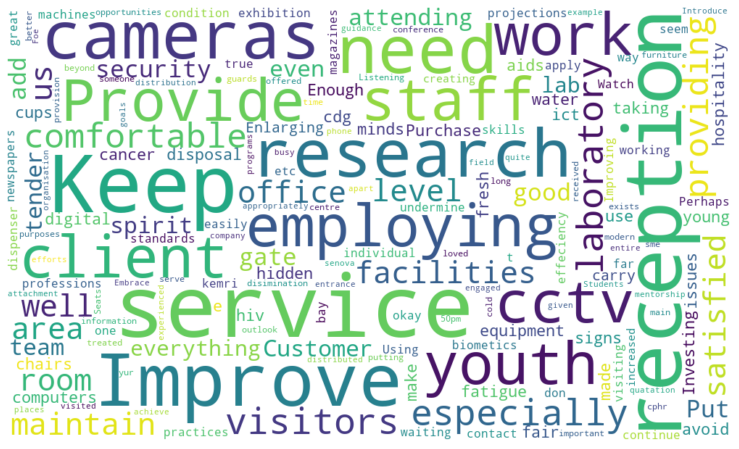

In [106]:
# Plotting Word Cloud 

from wordcloud import WordCloud, STOPWORDS
from PIL import Image,ImageFont


stopwords = set(STOPWORDS)


allWords = ' '.join([reccomendations for reccomendations in reccomendations])

wordCloud = WordCloud(width = 1000, height = 600, random_state = 43, max_font_size = 119,
                    background_color='white',stopwords = stopwords).generate(allWords)

plt.figure( figsize = (16,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
     

In [107]:
# Removing records where the customer did not provide any comment

cust_satis_df3 = cust_satis_df1[cust_satis_df1['HowToImproveServices'] != 'No reccomendation provided'].reset_index()

In [108]:
# Specifying stopwords to be removed

stop = set(STOPWORDS)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

cust_satis_df3["ReccomendationsWithoutStopwords"] = cust_satis_df3["HowToImproveServices"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# getting top 20 most used words in customer coments

Counter(" ".join(cust_satis_df3["ReccomendationsWithoutStopwords"]).split()).most_common(20)

[('By', 10),
 ('reception', 6),
 ('Keep', 5),
 ('Improve', 4),
 ('research', 4),
 ('cameras', 4),
 ('Provide', 3),
 ('employing', 3),
 ('The', 3),
 ('staff', 3),
 ('services', 3),
 ('cctv', 3),
 ('work', 3),
 ('especially', 2),
 ('visitors', 2),
 ('laboratory', 2),
 ('clients', 2),
 ('providing', 2),
 ('facilities', 2),
 ('level', 2)]

- From the word cloud and word count, the most common words used by KEMRI customers inluded words such as:

    - Keep, Cameras, Improve, Employing, Reseach, staff and services

In [109]:
# sentiment analyzer  

sentiment = SentimentIntensityAnalyzer()

# applying sentiment analyzer on some of the reccomebdations to get polarity scores

for sentences in sample_reccomendations:
    sentences
    ss = sentiment.polarity_scores(sentences)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentences)   

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Enough signs to be made for all especially cdg offices are hidden
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Purchase disposal cups for visitors to use for taking water
compound: 0.3182, 
neg: 0.0, 
neu: 0.465, 
pos: 0.535, 
Services are fair
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Provide them with ict equipment i.e computers
compound: -0.4939, 
neg: 0.457, 
neu: 0.543, 
pos: 0.0, 
Provide more laboratory chairs to avoid fatigue
compound: 0.7574, 
neg: 0.0, 
neu: 0.581, 
pos: 0.419, 
Improve on hospitality on the labs to make clients more comfortable
compound: 0.3744, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
Investing more in young fresh digital minds
compound: -0.4404, 
neg: 0.295, 
neu: 0.537, 
pos: 0.168, 
By doing more research on issues like hiv/aids and cancer
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Enlarging laboratory rooms
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
By providing more facilities to carr

In [110]:
# converting all reccomendations to lower case

cust_satis_df3['NewHowToImproveServices'] = cust_satis_df3['HowToImproveServices'].str.lower().str.split()

# Removing stopwords from customer reccomendations

cust_satis_df3['NewHowToImproveServices'] = cust_satis_df3['NewHowToImproveServices'].apply(lambda x : [item for item in x if item not in stop])

In [111]:
# lemmatizing customer reccomendations

cust_satis_df3['cleaned_reccomendations'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line))
for line in lists]).strip() for lists in cust_satis_df3['NewHowToImproveServices']] 

In [112]:
# Vectorizer

vectorizer = TfidfVectorizer(stop_words='english', analyzer = "word", max_features = 2500)

# applying vectorizer to reccomendations

model = vectorizer.fit_transform(cust_satis_df3['cleaned_reccomendations'].str.upper())

**Clustering reccomendations to make meaning out of them**

In [113]:
# Kmeans cluster

km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

# fitting model to kmeans clustering alghorithim

km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster %d:" %i,end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind],end='')
    print()    

cluster 0: employing staff research maintain spirit improve level providing facility room
cluster 1: service good fair received offered quite satisfied guidance entrance customer
cluster 2: need cctv camera tender youth modern seat furniture area comfortable
cluster 3: office hidden sign cdg especially far undermine contact services skill
cluster 4: reception add security gate camera outlook area pm time sme


**Insights**

- From analysis of top words and the results of clustering the various reccomendations, the following reccomdations were deduced:
    
    - Improvements in the Reception Area
    - Purchase of disposable water cups for visitors
    - Chairs in Laboratories to avoud fatigue
    - installation of CCTV cameras to improve security
    - introducing  a mentorship program 
    - Employing more staff 
    - Improve team spirit and maintaining standards

### 9.Do peak periods(Months or days) affect user satisfaction?

<AxesSubplot:>

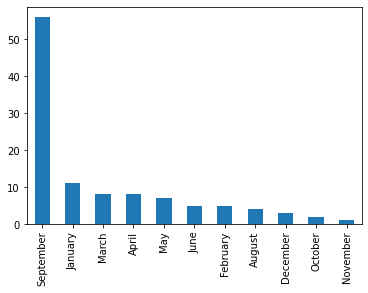

In [114]:
# Plotting bar chart charting customers numbers per month

cust_satis_df1['Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

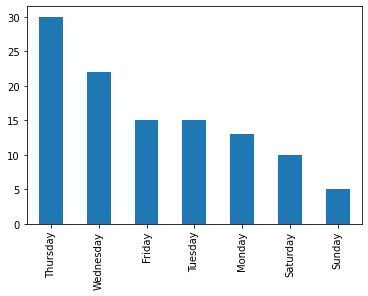

In [115]:
# Plotting bar chart charting customers numbers per day

cust_satis_df1['DayOfWeek'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Month'>

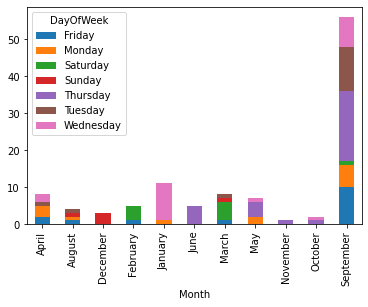

In [116]:
# A crosstab chart charting customer visists for different days for different months

pd.crosstab(cust_satis_df1['Month'],cust_satis_df1['DayOfWeek']).plot(kind="bar",stacked=True)


In [117]:
# Previewing value counts in AnyProblemsEncounteredExplainIfYes column

cust_satis_df1['AnyProblemsEncounteredExplainIfYes'].value_counts()

No     102
Yes      8
Name: AnyProblemsEncounteredExplainIfYes, dtype: int64

In [118]:
# Previewing value counts in AnyProblemsEncounteredExplainIfYes column for peak month os september

cust_satis_df1[cust_satis_df1['Month'] == 'September']['AnyProblemsEncounteredExplainIfYes'].value_counts()

No     52
Yes     4
Name: AnyProblemsEncounteredExplainIfYes, dtype: int64

**Insights**

- From the charts, September is by far the busiest month of the year for KEMRI while Thurdsay is the busiet day of the week though by a smaller margin relatie to other days of the week

- For the month of September, thursday is the busiest day of the week

- During the busiest month September is when most (50%) of all problems encountered by customers is reported

### 10.What is the likelyhood of a customer to reccomend KEMRI products?

<AxesSubplot:ylabel='None'>

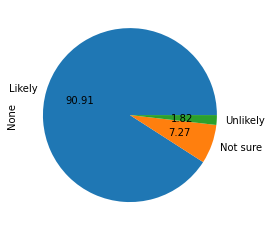

In [119]:
# pie chart to see the likely hood of customers to reccommend KEMRI products

cust_satis_df1.groupby('RecomendationOnKemriProducts').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

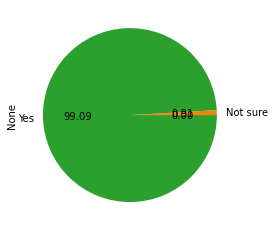

In [120]:
# pie chart to see the likely hood of customers to refer somebody to KEMRI

cust_satis_df1.groupby('ReferSomebodyKemri').size().plot(kind='pie', autopct='%.2f')

**Insight**

- From the pie chart, nine out ten customers are most likely to reccomend KEMRI products and close to 100% of all customers are willing to refer somebody to KEMRI

## Results

**1.Who are the clientele of KEMRI ?**

- Most KEMI customers are youth aged below 35 years and over half (58.18%) of all KEMRI customers are Male


- There were 9 organizations (excluding those that did not disclose information and those who came as themselves) among customers that visited KEMRI. 


- The top three organizations that frequent KEMRI were:
    - Service provider 52 visits
    - Public university 19 visits
    - Ngo 11 visits

    


**2.What are the  deparetments  of KEMRI that were visited ? How oftenly were these departments visited?**

- A total of 10 KEMRI departments recieved customers

- The top three most visited departments at KEMRI were:

    - Administration offices 34 visits
    - Kemri central laboratories 32 visits
    - Kemri kenyatta hospital based laboratories 30 visits
      
- These three departments account for over 80% of all customer visits to KEMRI


**3.What fraction of the customers fell satisfied, Disatisfied or Neutral?**

- Over 9/10 of KEMRi customers are either satissfied or extremely satisfied. Less than 10 percent of customers are either neutral of extremely unsatisfied


**4.What were the best and worst performing sectors per department? How did different departments perform relative to each other?**

- All departements as a whole are rated highly by customers at KEMRI all with score ratings greater than (4.5/5.0)

- Some sectors in various departments perform poorly relative to others

- The worst performing sector is the Staff knowledge of products in the Pan African Hub of Infectious Diseases and Phd Students Internshipdepartments departments with a rating score of 3.0/5.0


**5.What are the main services sought by KEMRI customer?**

- Clients mainly come to LEMRI seeking; Academic attchements, Diagnostic Services Scientific SErvices, Procurement Services, and requestion information.


**6.What are some of the problems if any encoutered by customers?**

- Clients at KEMRI mainly have issues concerning delays in payments, time delays in service provision, and unclear information from  staff


**7.What are the comments by the KEMRI customers?**

- Customers are mostly pleased with how sevices are rendered at KEMRI. They are enthralled with services at the reception and gate areas, the good and professional service delivery and their sensitivity to customer needs and in some instances the quick and effcient delivery of services


**8.What were the recommendations by KEMRI Customers?**

- Customers are  reccomending; Improvements in the Reception Area, Purchase of disposable water cups for visitors, Chairs in Laboratories to avoid fatigue, installation of CCTV cameras to improve security , introducion of  a mentorship program, Employing more staff, and Improving team spirit and maintaining standards


**9.Do peak periods(Months or days) affect user satisfaction?**

- Peak periods cause an increase in problems faced by clients at KEMRI. September KEMRI's busiest month accounted for half of all customers who noted they had problems accessing a service at KEMRI


**10.What is the likelyhood of a customer to reccomend KEMRI products or a person to KEMRI?**

- Most customers are likely to reccomend KEMRI products and a person to KEMR. 9 in 10 customers is likely to refer  product while almost all customers are likely to refer someone to KEMRI 


## Conclusions

- KEMRI has 10 active departments dealing mainly with young mostly male people from various academic institutions, NGOs or service providers. Most of these clients are either seeking academic attachments, diagnostic services, scientific services, procurement services or are requesting information.

- The most active KEMRI departments are the administration offices, KEMRI Central Laboratories and KEMRI Kenyatta Hospital Based Laboratories  accounting for slightly below 90% of all KEMRI traffic. 

- All departments in general are perfoming well. However, there are some sectors in some departments  mainly knowledge of staff of products sector that requires improvement.

- Most of the problems reported by customers occur in the most active month of the year (September)

- On a whole however most clients are very content and happy with KEMRI services and a large majority of clients are willing to reccomend KEMRI products and reccomend other people to come KEMRI

## Reccomendation

**From the analysis, we were able to arrive at the following reccomendations.**

- Firstly we recommend a modernization of KEMRI facilities. From our analysis most clients of KEMRI are young people aged below 35 years hence  can be assumed to be digitally savvy. This entails installing of CCTV cameras to enhance security, installation of ICT equipments in  various laboratories and digitization of payment services eg having a paybill number and using M-pesa to settle petty transactions.

- Secondly, we recommend periodical staff training and team building activities. From our analysis, we were able to observe that staff in certain departments had poor knowledge of products. We also noted customer complaints regarding the clarity of the information given to them and they also noticed that some staff had low spirits. To improve the knowledge of the staff on products and the clarity of their communications, we recommend team building activities to promote team spirit and improve morale.

- Thirdly we recommend hiring extra staff on a temporary basis during peak operating periods. From the analysis, we were able to note September is the busiest month of the year. Half of all customers who reported having had a problem had visited during this month. Furthermore, a number of customers were complaining about delays in service delivery during the same month. Adding staff on a temporary basis makes service delivery faster and more efficient while saving on costs. 

- Fourthly we recommend adding amenities to the reception, laboratories and conference halls. In our analysis complaints of cold conference rooms and fatigue due to lack of seats in laboratories. We also noted customer recommendations of adding seats in the reception area.